In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbs 
from sklearn.model_selection import train_test_split
from sklearn import tree

In [49]:
agua = pd.read_excel('Datos_Zona_Metropolitana_MTY.xlsx')
agua

,Nombre de la entidad,Clave de municipio o demarcacion territorial,Nombre del municipio o demarcacion territorial,Clave de localidad,Nombre de la localidad,Clave de AGEB,Clave de la manzana,Poblacion de 65 años y mas,Poblacion de 18 a 24 años,Poblacion de 15 a 17 años,...,Hogares censales con persona de referencia hombre,Hogares censales con persona de referencia mujer,Viviendas particulares habitadas con piso de tierra,Viviendas particulares habitadas con un dormitorio,Viviendas particulares habitadas que disponen de agua entubada y se abastecen del servicio publico de agua,"Viviendas particulares habitadas que no disponen de automovil o camioneta, ni de motocicleta o motoneta",Viviendas particulares habitadas sin radio ni televisor,Viviendas particulares habitadas sin línea telefonica fija ni teléfono celular,Viviendas particulares habitadas sin computadora ni Internet,Viviendas particulares habitadas sin tecnologías de la informacion y de la comunicacion (TIC)
0,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,21,14,27,8,...,24,20,0,9,44,25,*,6,14,0
1,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,22,29,24,6,...,27,16,0,4,43,25,*,3,18,*
2,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,23,22,20,7,...,24,19,0,6,43,30,*,5,12,*
3,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,24,14,15,5,...,15,11,0,4,26,11,*,5,6,*
4,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,25,8,10,*,...,13,6,0,5,19,10,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Nuevo León,48,Santa Catarina,1,Ciudad Santa Catarina,087A,42,5,18,5,...,24,7,0,5,31,12,*,0,*,0
29996,Nuevo León,48,Santa Catarina,1,Ciudad Santa Catarina,087A,43,5,14,4,...,20,5,0,4,25,4,0,0,*,0
29997,Nuevo León,48,Santa Catarina,1,Ciudad Santa Catarina,087A,44,0,4,4,...,16,*,0,*,16,5,*,0,*,0
29998,Nuevo Leon,48,Santa Catarina,1,Total AGEB urbana,0899,0,246,589,204,...,708,225,*,179,926,354,12,22,177,4


In [50]:
agua.shape

(30000, 40)

In [42]:
agua = agua.replace(['*'], '0')
agua = agua.replace(['N/D'],'0')
agua

,Nombre de la entidad,Clave de municipio o demarcacion territorial,Nombre del municipio o demarcacion territorial,Clave de localidad,Nombre de la localidad,Clave de AGEB,Clave de la manzana,Poblacion de 65 años y mas,Poblacion de 18 a 24 años,Poblacion de 15 a 17 años,...,Hogares censales con persona de referencia hombre,Hogares censales con persona de referencia mujer,Viviendas particulares habitadas con piso de tierra,Viviendas particulares habitadas con un dormitorio,Viviendas particulares habitadas que disponen de agua entubada y se abastecen del servicio publico de agua,"Viviendas particulares habitadas que no disponen de automovil o camioneta, ni de motocicleta o motoneta",Viviendas particulares habitadas sin radio ni televisor,Viviendas particulares habitadas sin línea telefonica fija ni teléfono celular,Viviendas particulares habitadas sin computadora ni Internet,Viviendas particulares habitadas sin tecnologías de la informacion y de la comunicacion (TIC)
0,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,21,14,27,8,...,24,20,0,9,44,25,0,6,14,0
1,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,22,29,24,6,...,27,16,0,4,43,25,0,3,18,0
2,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,23,22,20,7,...,24,19,0,6,43,30,0,5,12,0
3,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,24,14,15,5,...,15,11,0,4,26,11,0,5,6,0
4,Nuevo León,6,Apodaca,1,Ciudad Apodaca,0460,25,8,10,0,...,13,6,0,5,19,10,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Nuevo León,48,Santa Catarina,1,Ciudad Santa Catarina,087A,42,5,18,5,...,24,7,0,5,31,12,0,0,0,0
29996,Nuevo León,48,Santa Catarina,1,Ciudad Santa Catarina,087A,43,5,14,4,...,20,5,0,4,25,4,0,0,0,0
29997,Nuevo León,48,Santa Catarina,1,Ciudad Santa Catarina,087A,44,0,4,4,...,16,0,0,0,16,5,0,0,0,0
29998,Nuevo Leon,48,Santa Catarina,1,Total AGEB urbana,0899,0,246,589,204,...,708,225,0,179,926,354,12,22,177,4


In [43]:
agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0   Nombre de la entidad                                                                                        30000 non-null  object
 1   Clave de municipio o demarcacion territorial                                                                30000 non-null  int64 
 2   Nombre del municipio o demarcacion territorial                                                              30000 non-null  object
 3   Clave de localidad                                                                                          30000 non-null  int64 
 4   Nombre de la localidad                                                

C:\Users\josec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josec\anacond

TypeError: 'value' must be an instance of str or bytes, not a int

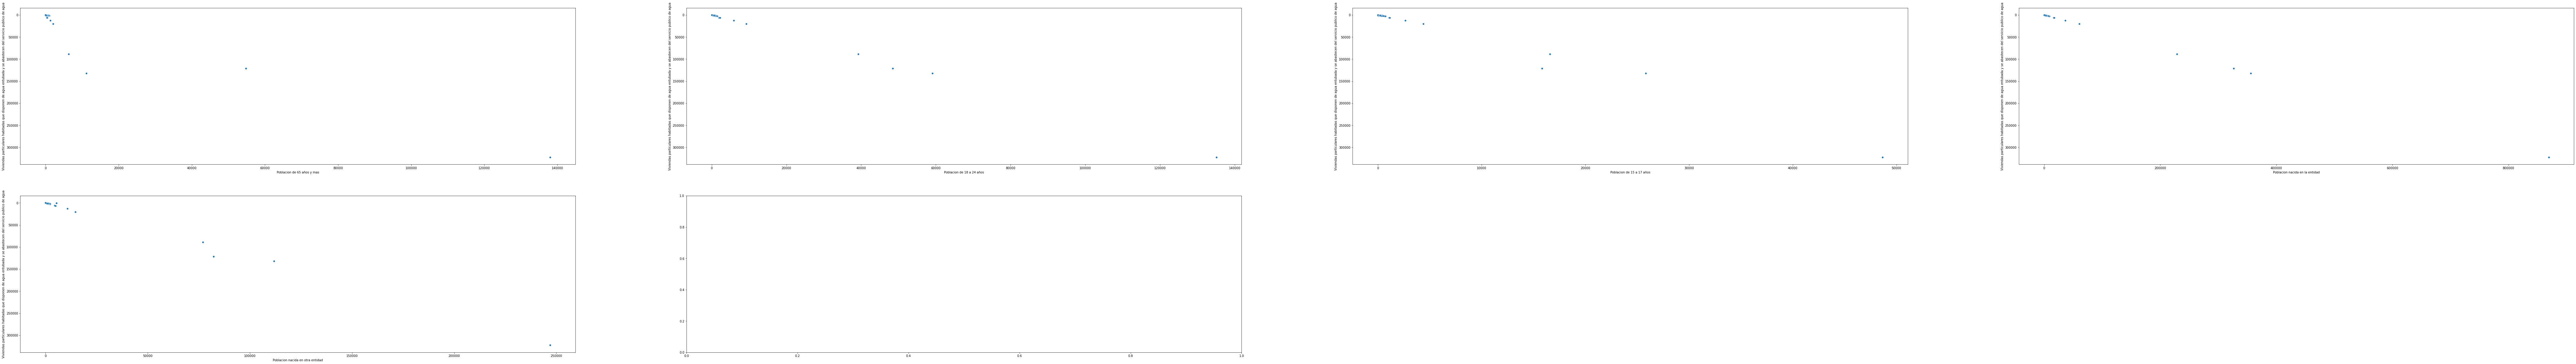

In [47]:
nrows= 9
ncols = 4
columns = list(agua.columns)
columns.remove('Nombre de la entidad')
columns.remove('Clave de municipio o demarcacion territorial')
columns.remove('Nombre del municipio o demarcacion territorial')
columns.remove('Clave de localidad')
columns.remove('Nombre de la localidad')
columns.remove('Clave de AGEB')
columns.remove('Clave de la manzana')
count=1
plt.subplots(figsize=(150, 100))
for i in columns:
    plt.subplot(nrows, ncols, count)
    sbs.scatterplot(agua[i],agua['Viviendas particulares habitadas que disponen de agua entubada y se abastecen del servicio publico de agua'])
    count+=1

plt.show()

In [26]:
agua.describe()

,Clave de municipio o demarcacion territorial,Clave de localidad,Clave de la manzana
count,30000.000000,30000.000000,30000.000000
mean,29.998933,19.174933,21.495500
std,13.256216,71.944262,17.713216
min,6.000000,0.000000,0.000000
25%,21.000000,1.000000,9.000000
50%,31.000000,1.000000,19.000000
75%,39.000000,1.000000,31.000000
max,48.000000,406.000000,800.000000
